# Importações 

In [525]:
#pip install pandas matplotlib scikit-learn

In [526]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import zscore
from collections import Counter
import numpy as np

In [527]:
file_path = r'C:\Users\Thalyson\Desktop\movies.csv'
df =  pd.read_csv(file_path)

KeyboardInterrupt: 

# Filtros

## Filmes ja lançados (status = Released)
Filmes que ainda não foram lançados não possuem dados importantes para a análise

In [ ]:
registros_antes = len(df)
df = df[df['status'] == 'Released']
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 5223


## Registros duplicados
Não faz sentido ter o mesmo filme mais de uma vez

In [ ]:
registros_antes = len(df)
df = df.drop_duplicates()
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 0


### Duplicados por titulo e data de lançamento

In [ ]:
duplicados = df[df.duplicated(subset=['title', 'release_date'], keep=False)]
exemplo = df[df['title'].isin(['The Eighth Clause', 'Battle: Freestyle'])].sort_values(by='title')
exemplo.head(10)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
126,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,333.723,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,28.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
198,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,238.540,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,30.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
234,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,210.928,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,30.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
13,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.6,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN
15815,841524,The Eighth Clause,Drama-Thriller,es,Kat and Borja appear to be a perfect couple bu...,10.293,SDB Films-El Hombre Orquesta-Expansión Films E...,2022-04-29,0.0,0.0,80.0,Released,NaN,4.2,6.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/5CbVMeLvaGn87gx05waiIJ0JySr.jpg,/uA0nUh1JerC4TkNiTzwS4B5kjTN.jpg,769636-346651-324542-343674-227970


In [ ]:
registros_antes = len(df)
df = df.drop_duplicates(subset=['title', 'release_date'])
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 61422


In [ ]:
exemplo = df[df['title'].isin(['The Eighth Clause', 'Battle: Freestyle'])].sort_values(by='title')
exemplo.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
126,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,333.723,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,28.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
13,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.6,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN


## Budget > 0
Filmes com budget igual a 0 ou negativo, representam inconssitência com as informações, trazendo erros para a analise

In [ ]:
registros_antes = len(df)
df = df[df['budget'] > 0]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")


Registros perdidos com o filtro: 622512


## Runtime > 70
Filmes com runtime menores que 70 não são considerados longa-metragem, que é nosso foco

In [ ]:
registros_antes = len(df)
df = df[df['runtime'] > 70]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 12383


## Vote_count > 30
Filmes com poucos votos, podem levantar erros estatisticos sobre a analise dos filmes, pois o target 'vote_average' poderá ficar enviesado

In [ ]:
registros_antes = len(df)
df = df[df['vote_count'] > 30]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 9956


## Removendo colunas que não serão utilizadas na análise
- Title -> não usaremos processamento textual
- Overview -> não usaremos processamento textual
- Production Companies -> Vale com o One Hot Encoding? 
- Revenue -> Vazamento de dados.
- Status -> registro unico agr, ent inutil
- Tagline -> não usaremos processamento textual e 85% dos registros são NaN
- vote_avarege -> TARGET 
- vote_count -> vazamento de dados.
- Credits -> Vale com o One Hot Encoding?
- Keywords -> não usaremos processamento textual e 71% dos registros são NaN
- Poster_path e Backdrop_path -> não faz sentido para a análise
- Recommendations -> não faz sentido para a análise, 95% dos valores são NaN, vazamento de dados

In [ ]:
df = df.drop(columns=[
    'id','title', 'overview', 'revenue', 'status', 'tagline', 
    'poster_path', 'backdrop_path', 'recommendations', 'keywords',
    'credits'
])

# Colunas que serão utilizadas na análise
print("Colunas que serão utilizadas na análise:")
print(df.columns)

Colunas que serão utilizadas na análise:
Index(['genres', 'original_language', 'popularity', 'production_companies',
       'release_date', 'budget', 'runtime', 'vote_average', 'vote_count'],
      dtype='object')


## Limpando todos os valores nulos

In [ ]:
registros_antes = len(df)
df = df.dropna()
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 231


# Ajustando colunas 

In [ ]:
def multi_hot_top_n(df, col, top_n=19):
    # Flatten todas as listas para contar os mais frequentes
    all_values = [item for sublist in df[col] for item in sublist]
    top = pd.Series(all_values).value_counts().nlargest(top_n).index.tolist()

    # Substitui os que não estão no top por 'Outros'
    def filter_top(vals):
        return [v.strip() if v.strip() in top else 'Outros' for v in vals]

    filtered = df[col].apply(filter_top)

    mlb = MultiLabelBinarizer()
    result = pd.DataFrame(mlb.fit_transform(filtered), columns=mlb.classes_, index=df.index)

    return result

## Data de lançamento
- Transformando em duas colunas, uma responsável pelo ano de lançamento e outra pelo mês de lançamento

In [ ]:
# Tratando a data
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df.drop(columns=['release_date'], inplace=True)

## Generos cinematográficos 

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x.split('-'))
contagem = Counter([genero for sublist in df['genres'] for genero in sublist])

generos_raros = [g for g, count in contagem.items() if count < 900]

def substituir_raros(lista):
    return [g if g not in generos_raros else 'Outros' for g in lista]

df['genres'] = df['genres'].apply(substituir_raros)

# Reconta os gêneros agora que os raros foram substituídos por "Outros"
contagem_atualizada = Counter([genero for lista in df['genres'] for genero in lista])

# Converte para Series para ordenar e visualizar melhor
genero_series = pd.Series(contagem_atualizada).sort_values(ascending=False)

# Exibe o resultado
print(genero_series)
print(f"\nTotal de gêneros únicos: {len(genero_series)}")
# SMOTE?
# SMOTE-EEN?

Drama              4833
Comedy             3574
Thriller           2799
Action             2720
Outros             2215
Romance            1783
Adventure          1734
Horror             1632
Crime              1630
Science Fiction    1254
Fantasy            1022
Family              967
Mystery             920
dtype: int64

Total de gêneros únicos: 13


In [ ]:
genres_encoded = multi_hot_top_n(df, 'genres', top_n=19)

In [ ]:
df= pd.concat([df.drop(['genres'], axis=1),
                genres_encoded], axis=1)

## Ajustando coluna da production_companies

In [ ]:
teste = df['production_companies'].apply(lambda x: x.split('-')).copy()
teste = teste.explode().reset_index(drop=True)
production_companies_counts = teste.value_counts() # Apply value_counts directly to the Series
print(production_companies_counts.head(20))
print(len(production_companies_counts))

production_companies
Warner Bros. Pictures        629
Universal Pictures           621
20th Century Fox             469
Columbia Pictures            466
Paramount                    454
Goldwyn                      336
Metro                        333
Mayer                        323
New Line Cinema              245
Canal+                       232
Walt Disney Pictures         204
United Artists               172
Lionsgate                    165
Miramax                      164
Touchstone Pictures          160
StudioCanal                  142
TriStar Pictures             127
Relativity Media             126
DreamWorks Pictures          119
Village Roadshow Pictures    104
Name: count, dtype: int64
11602


In [ ]:
companies_encoded = multi_hot_top_n(df, 'production_companies', top_n=10)

In [ ]:
df= pd.concat([df.drop(['production_companies'], axis=1),
                companies_encoded], axis=1)

In [ ]:
df['popularity_per_budget'] = df['popularity'] / (df['budget'] + 1)
df['vote_weighted'] = df['vote_average'] * df['vote_count']
df['runtime_per_budget'] = df['runtime'] / (df['budget'] + 1)
df['vote_popularity_weighted'] = df['vote_average'] * df['popularity']
import numpy as np
df['budget_log'] = np.log1p(df['budget'])
df['vote_count_log'] = np.log1p(df['vote_count'])

## Transformando gêneros em variáveis numéricas e adicionando zscore 

In [ ]:
# 1. Remover colunas indesejadas
colunas_ruins = ['-', 'a', 'e', 'i', 'n', 'o', 'r', 's', 't']
df = df.drop(columns=colunas_ruins, errors='ignore')

# 2. Remover colunas duplicadas (ex: duas "Outros")
df = df.loc[:, ~df.columns.duplicated()]

# 3. Definir colunas numéricas (incluindo gêneros one-hot)
features_numericas = [
    'popularity',
    'budget',
    'runtime',
    'vote_average',
    'vote_count',
    'popularity_per_budget',
    'vote_weighted',
    'runtime_per_budget',
    'vote_popularity_weighted'
]

df['budget'] = df['budget'].apply(lambda x: np.log1p(x))
df['vote_count'] = np.log1p(df['vote_count'])
display(df.columns)

# 4. Aplicar z-score e filtrar outliers
df_z = df[features_numericas].apply(zscore)
df = df[(df_z.abs() < 3).all(axis=1)]




Index(['original_language', 'popularity', 'budget', 'runtime', 'vote_average',
       'vote_count', 'release_year', 'release_month', 'Action', 'Adventure',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Outros', 'Romance', 'Science Fiction', 'Thriller',
       'popularity_per_budget', 'vote_weighted', 'runtime_per_budget',
       'vote_popularity_weighted', 'budget_log', 'vote_count_log'],
      dtype='object')

In [ ]:
idioma_para_continente = {
    # América do Norte
    'en': 'America_do_Norte',

    # Ásia
    'ko': 'Asia',
    'cn': 'Asia', # Chinês (Simplificado/Mandarin)
    'hi': 'Asia', # Hindi
    'ja': 'Asia', # Japonês
    'zh': 'Asia', # Chinês (Genérico/Variedades)
    'te': 'Asia', # Telugu
    'ar': 'Asia', # Árabe (Também África)
    'ml': 'Asia', # Malayalam
    'kn': 'Asia', # Kannada
    'ta': 'Asia', # Tamil
    'km': 'Asia', # Khmer
    'he': 'Asia', # Hebraico
    'bn': 'Asia', # Bengali
    'ms': 'Asia', # Malaio
    'bo': 'Asia', # Tibetano
    'kk': 'Asia', # Cazaque (Também Europa)
    'ka': 'Asia', # Georgiano (Também Europa)
    'ku': 'Asia', # Curdo (Também Europa)
    'ur': 'Asia', # Urdu
    'ps': 'Asia', # Pashto
    'mr': 'Asia', # Marathi
    'lo': 'Asia', # Laosiano
    'ne': 'Asia', # Nepalês


    # Europa
    'es': 'Europa', # Espanhol (Também Américas)
    'no': 'Europa', # Norueguês
    'fi': 'Europa', # Finlandês
    'ru': 'Europa', # Russo (Também Ásia)
    'uk': 'Europa', # Ucraniano
    'nl': 'Europa', # Holandês
    'it': 'Europa', # Italiano
    'fr': 'Europa', # Francês (Também Américas, África)
    'pl': 'Europa', # Polonês
    'pt': 'Europa', # Português (Também Américas, África)
    'de': 'Europa', # Alemão
    'ro': 'Europa', # Romeno
    'sr': 'Europa', # Sérvio
    'sv': 'Europa', # Sueco
    'gl': 'Europa', # Galego
    'tr': 'Europa', # Turco (Também Ásia)
    'cs': 'Europa', # Tcheco
    'el': 'Europa', # Grego
    'ga': 'Europa', # Irlandês
    'mk': 'Europa', # Macedônio
    'sh': 'Europa', # Sérvio-Croata
    'hu': 'Europa', # Húngaro
    'eu': 'Europa', # Basco
    'lv': 'Europa', # Letão
    'sk': 'Europa', # Eslovaco
    'et': 'Europa', # Estoniano
    'hy': 'Europa', # Armênio (Também Ásia)
    'sq': 'Europa', # Albanês
    'se': 'Europa', # Sami Setentrional
    'sl': 'Europa', # Esloveno
    'cy': 'Europa', # Galês
    'lt': 'Europa', # Lituano
    'hr': 'Europa', # Croata
    'bg': 'Europa', # Búlgaro
    'yi': 'Europa', # Iídiche
    'eo': 'Europa', # Esperanto
    'nb': 'Europa', # Bokmål Norueguês


    # África
    'sw': 'Africa', # Suaíli
    'af': 'Africa', # Africâner
    'am': 'Africa', # Amárico
    'zu': 'Africa', # Zulu
    'xh': 'Africa', # Xhosa
    'wo': 'Africa', # Uolofe
    'bm': 'Africa', # Bambara


    # América do Sul
    'qu': 'America_do_Sul', # Quechua
    'ay': 'America_do_Sul', # Aimará


    # Oceania
    'mi': 'Oceania', # Maori


    # Outros / Desconhecido / Códigos Especiais
    'id': 'Asia',   # Indonésio (Geralmente Ásia, mas para simplificar, pode agrupar)
    'is': 'Europa',   # Islandês (Europa, mas pode ser um grupo separado se for muito raro)
    'tl': 'Asia',   # Tagalo (Filipino) (Ásia, mas pode agrupar)
    'dz': 'Asia',   # Dzongkha (Ásia, Butão)
    'xx': 'Outros',   # Sem linguagem / Linguagem desconhecida (Código especial)
    'la': 'Outros',   # Latim (Histórico)
    'vi': 'Asia',   # Vietnamita (Ásia, mas pode agrupar)
    'bs': 'Europa',   # Bósnio (Europa, mas pode agrupar)
    'iu': 'America_do_Norte',   # Inuktitut (América do Norte, Ártico)
    'pa': 'Asia',   # Punjabi (Ásia, mas pode agrupar)
    'th': 'Asia', # Tailandês (Ásia, mas para manter consistência com Ásia acima)

    # Adicionar os idiomas restantes que não foram listados explicitamente acima
    # ...
}

df['continent'] = df['original_language'].map(idioma_para_continente)
df['continent'] = df['continent'].fillna('Outros')
continent_encoded = pd.get_dummies(df['continent'], prefix='continent')

df = pd.concat([df.drop(columns=['continent', 'original_language'], errors='ignore'), continent_encoded], axis=1)

# Adicione ao features_numericas:
features_numericas += [col for col in continent_encoded.columns if col not in features_numericas]
print(df.columns)

Index(['popularity', 'budget', 'runtime', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'Action', 'Adventure', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Outros',
       'Romance', 'Science Fiction', 'Thriller', 'popularity_per_budget',
       'vote_weighted', 'runtime_per_budget', 'vote_popularity_weighted',
       'budget_log', 'vote_count_log', 'continent_Africa',
       'continent_America_do_Norte', 'continent_Asia', 'continent_Europa',
       'continent_Outros'],
      dtype='object')


## Escala Logaritmica no budget

In [ ]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

cont_cols = ['popularity', 'budget', 'runtime', 'vote_average', 'vote_count']

df_clean = remove_outliers_iqr(df, cont_cols)
print(f"Amostras antes: {len(df)} - Amostras depois: {len(df_clean)}")

Amostras antes: 9985 - Amostras depois: 8512


In [ ]:
df['popularity_per_budget'] = df['popularity'] / (df['budget'] + 1)
df['vote_weighted'] = df['vote_average'] * df['vote_count']
df['runtime_per_budget'] = df['runtime'] / (df['budget'] + 1)
df['vote_popularity_weighted'] = df['vote_average'] * df['popularity']
import numpy as np
df['budget_log'] = np.log1p(df['budget'])
df['vote_count_log'] = np.log1p(df['vote_count'])

Número de componentes PCA escolhidos: 3
Silhouette Score médio com PCA: 0.478
Cluster 0: 205 amostras (2.05% do total)
Cluster 1: 7917 amostras (79.29% do total)
Cluster 2: 55 amostras (0.55% do total)
Cluster 3: 1808 amostras (18.11% do total)


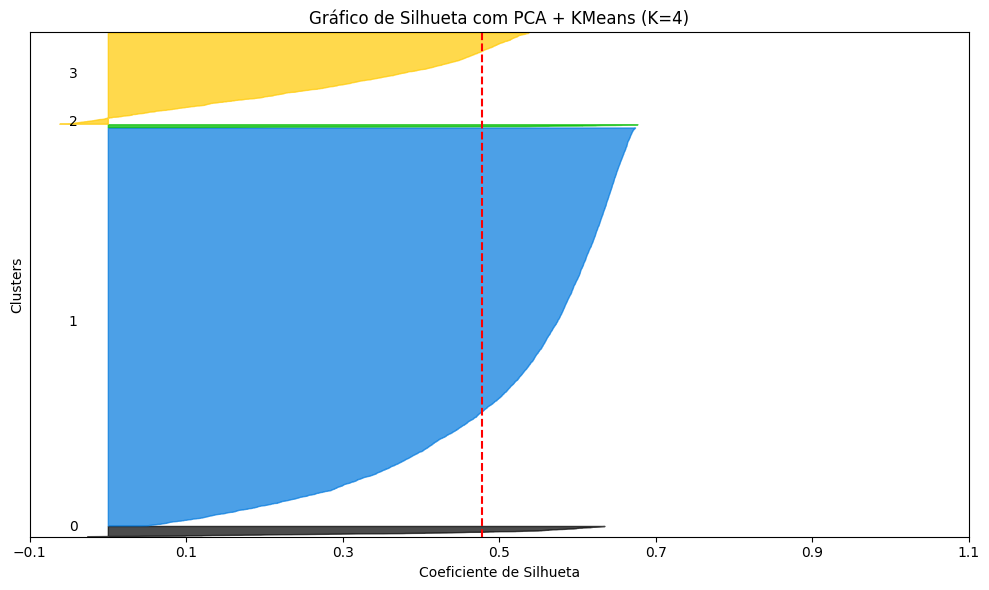

Média das variáveis por cluster:


,popularity,budget,runtime,vote_average,vote_count,popularity_per_budget,vote_weighted,runtime_per_budget,vote_popularity_weighted
cluster,,,,,,,,,
0,127.72,17.44,113.96,7.00,7.65,6.98,53.80,6.19,889.75
1,11.60,15.62,105.40,6.23,5.55,0.69,34.93,6.38,72.82
2,348.87,17.25,116.53,7.01,6.89,19.33,48.86,6.42,2435.05
3,39.09,17.00,110.32,6.72,7.75,2.18,52.22,6.15,261.89


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 1. Seleção das colunas (numéricas + derivadas)
features = [
    'popularity',
    'budget',
    'runtime',
    'vote_average',
    'vote_count',
    'popularity_per_budget',
    'vote_weighted',
    'runtime_per_budget',
    'vote_popularity_weighted'
]
X = df[features].copy()

# 2. Escalonamento com RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA mantendo 95% da variância
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"Número de componentes PCA escolhidos: {X_pca.shape[1]}")

# 4. KMeans com 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=100)
cluster_labels = kmeans.fit_predict(X_pca)

# 5. Silhouette Score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score médio com PCA: {silhouette_avg:.3f}")

# 6. Distribuição de amostras por cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f'Cluster {cluster}: {count} amostras ({count / len(cluster_labels):.2%} do total)')

# 7. Gráfico de silhueta
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Gráfico de Silhueta com PCA + KMeans (K=4)")
ax1.set_xlabel("Coeficiente de Silhueta")
ax1.set_ylabel("Clusters")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.tight_layout()
plt.show()

# Adiciona os rótulos dos clusters ao DataFrame original
df_analisado = df.copy()
df_analisado['cluster'] = cluster_labels  # cluster_labels deve vir do seu KMeans

# Calcula a média de cada feature por cluster
resumo_por_cluster = df_analisado.groupby('cluster')[features].mean().round(2)

# Exibe o resumo
print("Média das variáveis por cluster:")
display(resumo_por_cluster)


K=2: Silhouette = 0.881
K=3: Silhouette = 0.653
K=4: Silhouette = 0.419
K=5: Silhouette = 0.287
K=6: Silhouette = 0.271
K=7: Silhouette = 0.274
K=8: Silhouette = 0.248
K=9: Silhouette = 0.228
K=10: Silhouette = 0.217
K=11: Silhouette = 0.217
K=12: Silhouette = 0.217
K=13: Silhouette = 0.213
K=14: Silhouette = 0.208
K=15: Silhouette = 0.205


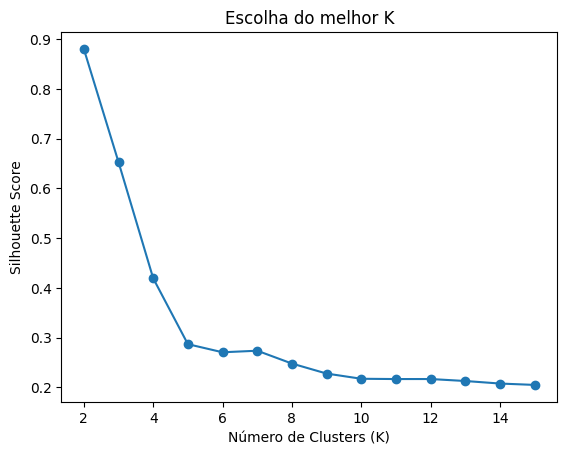

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 16)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"K={k}: Silhouette = {score:.3f}")

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Escolha do melhor K")
plt.show()
